# **Credit Card Fraud Detection**

Credit card fraud detection is an important issue in the field of financial transactions. Fraud can occur in various ways, such as through the physical theft of a card, or through the use of stolen card information for online transactions. It is important to detect and prevent credit card fraud, as it can lead to significant financial losses for both cardholders and financial institutions.

In the field of credit card fraud detection, machine learning algorithms have been widely used to identify fraudulent transactions. These algorithms are able to analyze large amounts of data and identify patterns that may indicate fraudulent activity.

In our project we used a dataset containing credit card transaction information was used. This dataset had 5 rows and 31 columns, and a total of 284,807 data points. In addition to splitting the data into training and test sets and applying machine learning models, the project also involved pre-processing the data. This included dropping unwanted columns, as well as visualizing and exploring the data to better understand its characteristics

Pre-processing the data is an important step in any machine learning project, as it can help to improve the accuracy of the models. By removing unnecessary or irrelevant columns, the data is cleaned and made more manageable, which can lead to more efficient model training and better performance.

Visualizing the data can also be helpful in understanding its characteristics and identifying any patterns or trends that may be relevant to the task at hand. This can inform the choice of machine learning algorithms and techniques, as well as help to identify any issues or challenges that may need to be addressed.

The performance of these models was evaluated using the receiver operating characteristic (ROC) curve and the area under the curve (AUC) metric. The classification report was also used to evaluate the models.

Three machine learning models were applied: K-Nearest Neighbors (KNN), Decision Tree, and Random Forest.

To address the issue of class imbalance in the dataset (where the number of fraudulent transactions is much smaller than the number of legitimate transactions), the Synthetic Minority Oversampling Technique (SMOTE) was applied. This technique synthesizes new data points for the minority class (fraudulent transactions) in order to balance the dataset.

After applying SMOTE and re-running the three models, the Random Forest model was found to be the best performer.

Overall, the use of machine learning algorithms and techniques such as SMOTE can be effective in detecting credit card fraud. It is important to carefully evaluate the performance of different models and choose the one that best fits the specific characteristics of the dataset.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection  import cross_val_score

from sklearn import model_selection
from sklearn.model_selection import train_test_split

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import classification_report

In [2]:
df = pd.read_csv('/content/drive/MyDrive/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

**The data does not have any null value**


# Datatype of the "Class"
We Should change this class to a categorical to make the
Fraudulent are 1s, Non-Fraudulent are 0s

In [4]:
#Changing the data type of Class

df['Class'] = df['Class'].astype('category')

#Renaming the classes
df['Class'] = df['Class'].cat.rename_categories({1:'Fraudulent',0:'Non_Fraudulent'})

df['Class']

0         Non_Fraudulent
1         Non_Fraudulent
2         Non_Fraudulent
3         Non_Fraudulent
4         Non_Fraudulent
               ...      
284802    Non_Fraudulent
284803    Non_Fraudulent
284804    Non_Fraudulent
284805    Non_Fraudulent
284806    Non_Fraudulent
Name: Class, Length: 284807, dtype: category
Categories (2, object): ['Non_Fraudulent', 'Fraudulent']

# Observation of our classes

In [5]:
#Getting the frequency of each class in the column
classes = df['Class'].value_counts()

#Calculating the percentages of each class
non_fraudulent_share = classes[0]/df['Class'].count()*100
print(non_fraudulent_share)
fraud_share = classes[1]/df['Class'].count()*100
print(fraud_share)

99.82725143693798
0.1727485630620034


In [6]:
#Creating a df for percentage of each class
class_share = {'Class':['fraudulent','non_fraudulent'],'Percentage':[fraud_share,non_fraudulent_share]}
class_share = pd.DataFrame(class_share)
class_share.head()

,Class,Percentage
0,fraudulent,0.172749
1,non_fraudulent,99.827251


# Data Visualization

**Bar plot**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


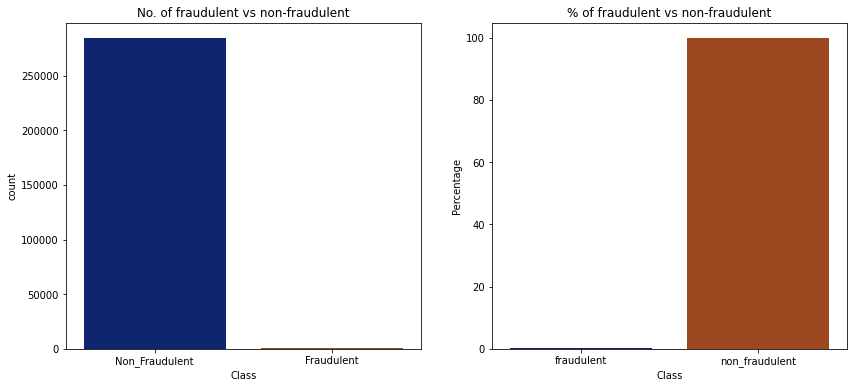

In [7]:
# Creating a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations

sns.set_palette("dark")

# Create a figure with two subplots
plt.figure(figsize=(14,6))

# Plot the number of fraudulent and non-fraudulent transactions in the first subplot
plt.subplot(121)
sns.countplot('Class',data=df)
plt.title('No. of fraudulent vs non-fraudulent')

# Plot the percentage of fraudulent and non-fraudulent transactions in the second subplot
plt.subplot(122)
sns.barplot(x='Class', y='Percentage',data=class_share)
plt.title('% of fraudulent vs non-fraudulent')

# Show the figure with both subplots
plt.show()

**Insights**: on the above plot, There are significantly fewer fraudulent cases compared to non-fraudulent cases in the dataset. This results in an imbalanced dataset

**Scatter Plot**

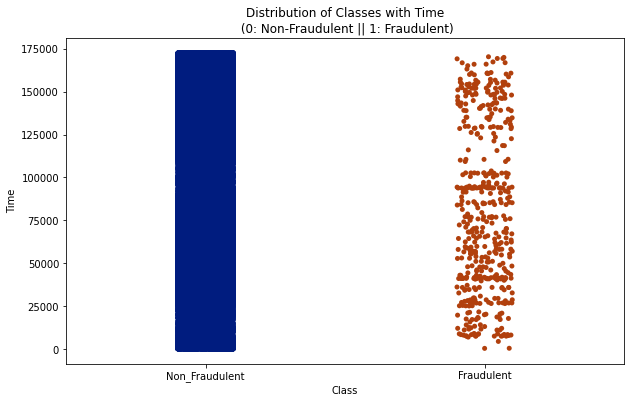

In [8]:
# Create a scatter plot for the distribution of classes over time
plt.figure(figsize=(10,6))
sns.stripplot(x= 'Class', y= 'Time',data=df)
plt.title('Distribution of Classes with Time\n (0: Non-Fraudulent || 1: Fraudulent)')
plt.show()

**Insights**: The plot does not reveal any particular pattern or trend in the distribution of fraudulent transactions over time. Fraudulent transactions appear to occur randomly.

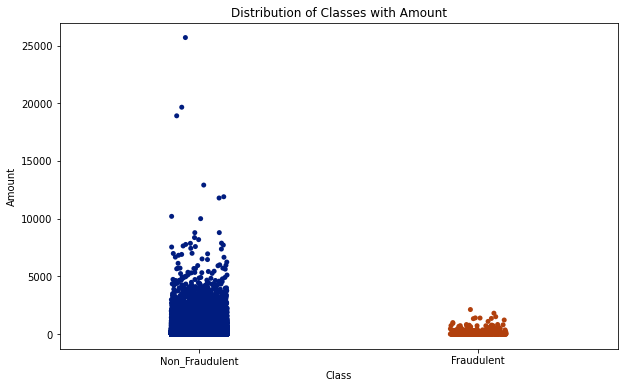

In [9]:
# Create a scatter plot for the distribution of classes over Amount paid

plt.figure(figsize=(10,6))
sns.stripplot(x= 'Class', y= 'Amount',data=df)
plt.title('Distribution of Classes with Amount')
plt.show()

**Insights**: Fraudulent transactions don't have any large amounts. The highest amount observed in the fraudulent transactions is around $2500.

In [10]:
# Dropping the column 'Time'
df=df.drop('Time',axis=1)
df.shape 

(284807, 30)

# Splitting Data into test and train

In [11]:
X = df.iloc[:,:-1]
y= df.iloc[:,-1] 

In [12]:
# Split the data into training and test sets
# The stratify = y for ensuring that the proportion of classes in the train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [13]:
# Print the total count of instances for each class in the original dataset
print('Total count for each class:\n', y.value_counts())

# Print the count of instances for each class in the training set
print("\nCount of each class in train data:\n",y_train.value_counts())

# Print the count of instances for each class in the test set
print("\nCount of each class in test data:\n",y_test.value_counts())

Total count for each class:
 Non_Fraudulent    284315
Fraudulent           492
Name: Class, dtype: int64

Count of each class in train data:
 Non_Fraudulent    227451
Fraudulent           394
Name: Class, dtype: int64

Count of each class in test data:
 Non_Fraudulent    56864
Fraudulent           98
Name: Class, dtype: int64


# **Model performance parameter**

In [14]:
from sklearn.metrics import roc_auc_score, roc_curve, classification_report
# Plot the Receiver Operating Characteristic (ROC) curve
def plot_roc(fpr, tpr):

    plt.plot(fpr, tpr, color='green', label='ROC')
    plt.plot([0, 1], [0, 1], color='yellow', linestyle='--')
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.show()

# Evaluate the performance of a classifier using the AUC score, ROC curve, and classification report
def clf_score(clf):

    # Get the predicted probabilities for the test data
    prob = clf.predict_proba(X_test)
    prob = prob[:, 1]
    
    # Calculate the AUC score
    auc = roc_auc_score(y_test, prob)    
    print('AUC: %.2f' % auc)
    
    # Plot the ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, prob, pos_label='Non_Fraudulent')
    plot_roc(fpr, tpr)
    
    # Get the predicted labels for the test data
    predicted = clf.predict(X_test)
    
    # Generate a classification report
    report = classification_report(y_test, predicted)
    print(report)
    
    return auc


# Model Building on the imbalanced dataset

# **1. K-Nearest Neighbors (KNN)**

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection  import cross_val_score
from sklearn.metrics import accuracy_score, mean_squared_error

knn = KNeighborsClassifier(n_neighbors=3)

knn_clf = knn.fit(X_train,y_train)


AUC: 0.89


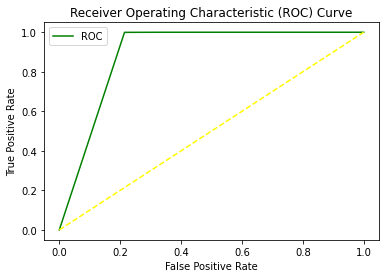

                precision    recall  f1-score   support

    Fraudulent       0.96      0.66      0.78        98
Non_Fraudulent       1.00      1.00      1.00     56864

      accuracy                           1.00     56962
     macro avg       0.98      0.83      0.89     56962
  weighted avg       1.00      1.00      1.00     56962



0.8927597927888092

In [16]:
clf_score(knn_clf)

# **Decision Tree**

In [17]:
from sklearn import tree
from pprint import pprint



In [18]:
depth_score=[]
dep_rng = [x for x in range(1,20)]
for i in dep_rng:
  clf = tree.DecisionTreeClassifier(max_depth=i)
  score_tree = cross_val_score(estimator=clf, X=X_train, y=y_train, cv=5, n_jobs=-1)
  depth_score.append(score_tree.mean())
print(depth_score)

[0.9990783207882552, 0.9992889903223684, 0.9993065461168777, 0.9994338256270712, 0.9994777151133446, 0.9994733261647172, 0.9994557703702078, 0.9994601593188351, 0.9993811582435427, 0.9994031029866794, 0.9994162698325617, 0.9993241019113871, 0.9993416577058966, 0.9993372687572691, 0.9992714345278587, 0.9992143781957032, 0.9992012113498212, 0.9992494897847222, 0.9991924334525665]


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


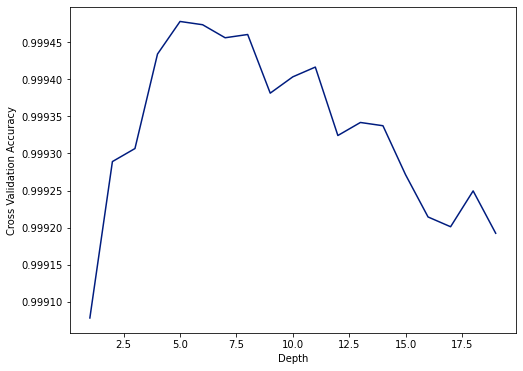

In [19]:
plt.figure(figsize=(8,6))
sns.lineplot(dep_rng,depth_score,markers=True,dashes=False)
plt.xlabel("Depth")
plt.ylabel("Cross Validation Accuracy")

plt.show()

AUC: 0.86


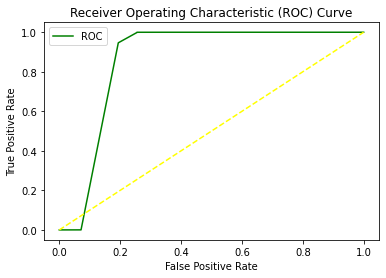

                precision    recall  f1-score   support

    Fraudulent       0.93      0.69      0.80        98
Non_Fraudulent       1.00      1.00      1.00     56864

      accuracy                           1.00     56962
     macro avg       0.97      0.85      0.90     56962
  weighted avg       1.00      1.00      1.00     56962



0.8623818161198075

In [20]:
#Fitting the model with depth=5 and plotting ROC curve

dt = tree.DecisionTreeClassifier(max_depth = 5)
dt_clf = dt.fit(X_train,y_train)

#Plotting ROC
clf_score(dt_clf)

# **Random Forest**

In [21]:
#Import libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [22]:
# Using grid search cv to find the best parameters.

param = {'n_estimators': [50, 60, 30], 'max_depth': [5,4, 3]}
rfc = RandomForestClassifier()
clf_rfc_cv = GridSearchCV(rfc, param, cv=5,scoring='roc_auc', n_jobs=-1)
clf_rfc_cv.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",clf_rfc_cv.best_params_)
print("accuracy :",clf_rfc_cv.best_score_)
print('Training metric:\n'+ classification_report(y_train, clf_rfc_cv.best_estimator_.predict(X_train)))
print('Test metric:\n'+ classification_report(y_test, clf_rfc_cv.best_estimator_.predict(X_test)))



tuned hpyerparameters :(best parameters)  {'max_depth': 5, 'n_estimators': 50}
accuracy : 0.9681569817129961
Training metric:
                precision    recall  f1-score   support

    Fraudulent       0.95      0.75      0.84       394
Non_Fraudulent       1.00      1.00      1.00    227451

      accuracy                           1.00    227845
     macro avg       0.98      0.88      0.92    227845
  weighted avg       1.00      1.00      1.00    227845

Test metric:
                precision    recall  f1-score   support

    Fraudulent       0.97      0.66      0.79        98
Non_Fraudulent       1.00      1.00      1.00     56864

      accuracy                           1.00     56962
     macro avg       0.98      0.83      0.89     56962
  weighted avg       1.00      1.00      1.00     56962



# **Class Imbalance Handling By Smote**

Reference: https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html

In [23]:
#importing SMOTE

from imblearn.over_sampling import SMOTE

sm = SMOTE()
X_sm, y_sm = sm.fit_resample(X_train, y_train)

In [24]:
#CHecking shape and class count after smote
from collections import Counter

print('Resampled dataset shape %s' % Counter(y_sm))
print(X_sm.shape)
print(y_sm.shape)

Resampled dataset shape Counter({'Non_Fraudulent': 227451, 'Fraudulent': 227451})
(454902, 29)
(454902,)


# **1. K-Nearest Neighbors (KNN) on SMOTE**

AUC: 0.94


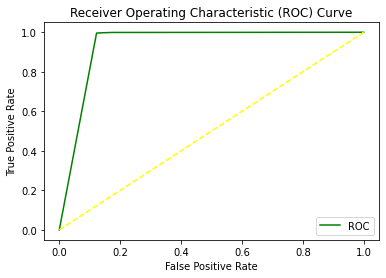

                precision    recall  f1-score   support

    Fraudulent       0.36      0.86      0.51        98
Non_Fraudulent       1.00      1.00      1.00     56864

      accuracy                           1.00     56962
     macro avg       0.68      0.93      0.75     56962
  weighted avg       1.00      1.00      1.00     56962



0.9379395557463278

In [25]:
# KNN with SMOTE re-sampled data

knn = KNeighborsClassifier(n_neighbors=3)

knn_sm = knn.fit(X_sm,y_sm)

#Printing ROC 

clf_score(knn_sm)

# **Decision Tree on Smote**

AUC: 0.96


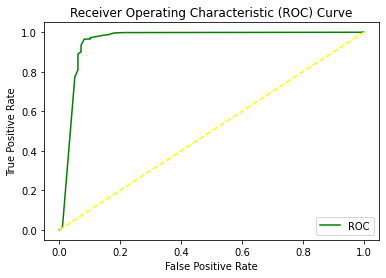

                precision    recall  f1-score   support

    Fraudulent       0.04      0.90      0.08        98
Non_Fraudulent       1.00      0.97      0.98     56864

      accuracy                           0.97     56962
     macro avg       0.52      0.93      0.53     56962
  weighted avg       1.00      0.97      0.98     56962



0.9585615302677064

In [26]:
dt = tree.DecisionTreeClassifier(max_depth = 5)
dt_sm = dt.fit(X_sm,y_sm)

#Plotting ROC
clf_score(dt_sm)

# **Random Forest on SMOTE**

AUC: 0.98


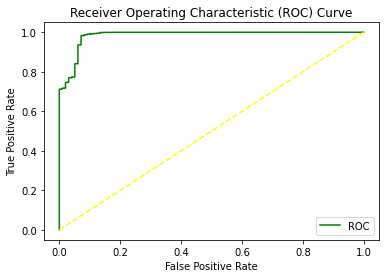

                precision    recall  f1-score   support

    Fraudulent       0.49      0.86      0.62        98
Non_Fraudulent       1.00      1.00      1.00     56864

      accuracy                           1.00     56962
     macro avg       0.75      0.93      0.81     56962
  weighted avg       1.00      1.00      1.00     56962



0.9839520431132498

In [27]:
#Building Random forest with best parameters on SMOTE
rf = RandomForestClassifier(max_depth=9, n_estimators=30)
RFC_sm = rf.fit(X_sm,y_sm)

#Plotting ROC
clf_score(RFC_sm)